In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\bikki\AppData\Local\Temp\ipykernel_6200\555797462.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
iris=sns.load_dataset("iris")
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [3]:
iris["species"].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [4]:
iris['species']=iris['species'].astype('category')
iris['species']=iris['species'].cat.codes

In [5]:
iris.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [6]:
x=iris.drop(columns='species')
x

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [7]:
y=iris['species']

In [8]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=0)

In [9]:
len(x_train)

105

In [10]:
len(x_test)

45

In [11]:
from sklearn.neighbors import KNeighborsClassifier
model=KNeighborsClassifier(n_neighbors=5)
model.fit(x_train,y_train)

KNeighborsClassifier()

In [12]:
y_train_pred=model.predict(x_train)
y_train_pred[:10]

array([1, 2, 2, 2, 2, 1, 2, 1, 1, 2], dtype=int8)

In [13]:
y_train[:10]

60     1
116    2
144    2
119    2
108    2
69     1
135    2
56     1
80     1
123    2
Name: species, dtype: int8

In [14]:
model.score(x_train,y_train)

0.9714285714285714

In [15]:
from sklearn.metrics import classification_report,confusion_matrix

In [16]:
cm=(confusion_matrix(y_train,y_train_pred))
cm

array([[34,  0,  0],
       [ 0, 30,  2],
       [ 0,  1, 38]], dtype=int64)

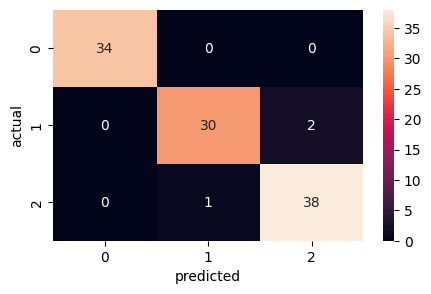

In [17]:
plt.figure(figsize=(5,3))
sns.heatmap(cm,annot=True)
plt.xlabel('predicted')
plt.ylabel('actual')
plt.show()

In [18]:
print('classification report')
print(classification_report(y_train,y_train_pred))

classification report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        34
           1       0.97      0.94      0.95        32
           2       0.95      0.97      0.96        39

    accuracy                           0.97       105
   macro avg       0.97      0.97      0.97       105
weighted avg       0.97      0.97      0.97       105



In [19]:
y_test_pred=model.predict(x_test)
y_test_pred[:10]

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1], dtype=int8)

In [20]:
y_test[:10]

114    2
62     1
33     0
107    2
7      0
100    2
40     0
86     1
76     1
71     1
Name: species, dtype: int8

In [21]:
model.score(x_test,y_test)

0.9777777777777777